# Customer Churn Analysis

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

Loading The datset From github

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


we have 7043 rows and 21 columns in our dataframe

most of or columns have categorical data in them which will have to encoded later om

We observe that our dependent or target variable 'churn' has binary data. Therfore this become a binary classification problem

# EDA

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

we have 21 columns in our data frame

# Checking Null Values in our Data Frame

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

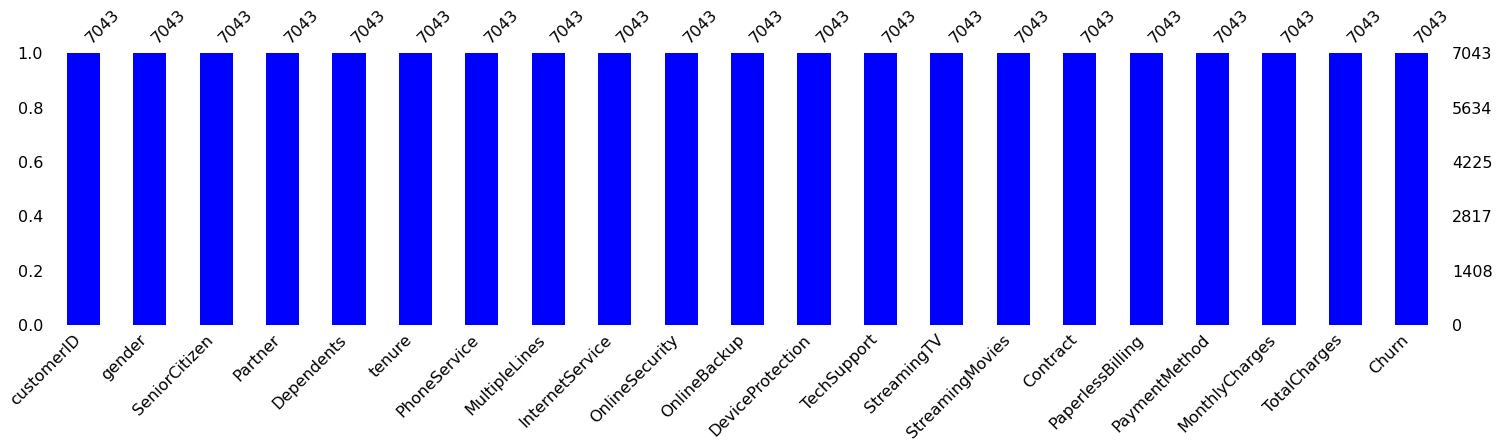

In [6]:
import missingno
missingno.bar(df, figsize = (25,5), color="blue")

There are no missing values in our dataset

# Let us make seperate lists for object datatype and int datatype

In [7]:
obj_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        obj_datatype.append(x)
print(f"Object Data Type Columns are:\n", obj_datatype)

num_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        num_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", num_datatype)

Object Data Type Columns are:
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Number Data Type Columns are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges']


# Checking Unique Values

In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

we can see that most of the columns have 2 or 3 unique values

# DataFrame Description

In [9]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


the describe function describes only the numerical data. it looks like the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile and maximum value are all properly distributed in terms of data points showing no abnormality as such.
We can confimr from count again that there are no missing values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


we can see that most of our columns are of object datatype which will have to be encoded inorder for the machine to understand them. Another thing that we can observe is that the total charges contains numerical values but has object datatype

In [11]:
df['TotalCharges'] = df['TotalCharges'].replace(' ' , '0.0')
df['TotalCharges'].value_counts()

0.0       11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [12]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].dtype

dtype('float64')

i could not covert the total cahrges from string to float as it had some missing values, therfore i replaced them with and after that succesfully coverted it to float datatype

In [13]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

# Dropping column

The customerID column has no impact on our model, therfore it is best to drop it

In [14]:
df=df.drop(['customerID'],axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Visualization

Countplot for object datatype

<AxesSubplot:xlabel='Churn', ylabel='count'>

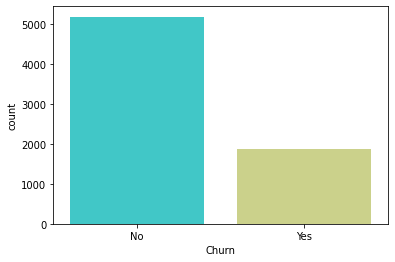

In [15]:
sns.countplot(x='Churn', data=df, palette="rainbow")

We can observe that the customer who dont churn are far more than customers who churn. Since churn is our target variable we will have to balance the data using SMOTE 

<AxesSubplot:xlabel='gender', ylabel='count'>

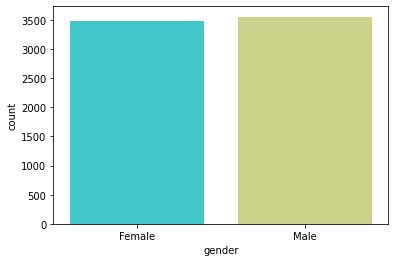

In [16]:
sns.countplot(x='gender', data=df, palette="rainbow")

We observe that the ratio of male to female customers is almost equal

<AxesSubplot:xlabel='Partner', ylabel='count'>

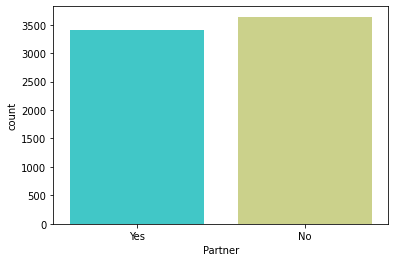

In [17]:
sns.countplot(x='Partner', data=df, palette="rainbow")

we can observe that the parnter data is almost balanced 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

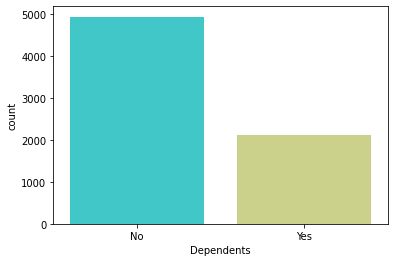

In [18]:
sns.countplot(x='Dependents', data=df, palette="rainbow")

we can see that people with dependents are less compared to people with no dependents

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

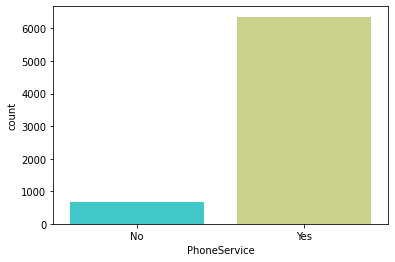

In [19]:
sns.countplot(x='PhoneService', data=df, palette="rainbow")

we can clearly see that people with a phone service are far greater than peole with no phone service

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

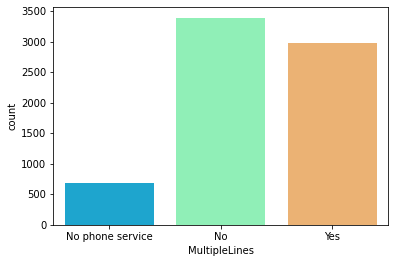

In [20]:
sns.countplot(x='MultipleLines', data=df, palette="rainbow")

we can observe that people with no multiple lines or with single lines are the most and then people with mutiple lines are almost equal to signal lines. People with no phone service are the least

<AxesSubplot:xlabel='InternetService', ylabel='count'>

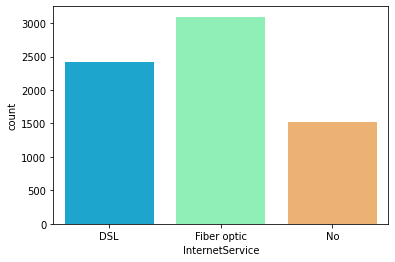

In [21]:
sns.countplot(x='InternetService', data=df, palette="rainbow")

people use the fibre optic internet service the most and then DSL. There are less people with no internet service

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

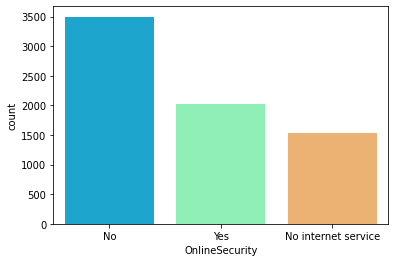

In [22]:
sns.countplot(x='OnlineSecurity', data=df, palette="rainbow")

We can see that people who have no online security are the highest which is surprising as it should be a must

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

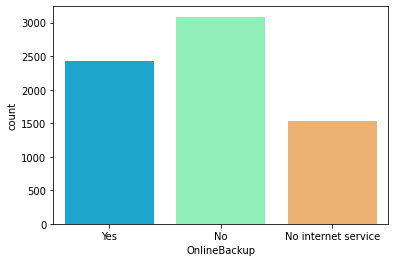

In [23]:
sns.countplot(x='OnlineBackup', data=df, palette="rainbow")

we see that people who do not back up their data are more then people who back up. There are less people who have no internet service

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

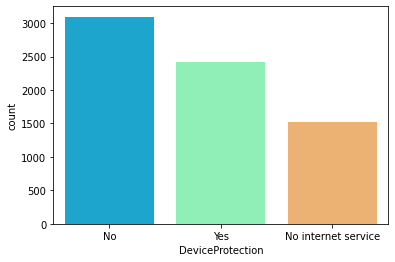

In [24]:
sns.countplot(x='DeviceProtection', data=df, palette="rainbow")

We see that majority of the people have no device protection and people are lesser in number who have device protection than people with no protection

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

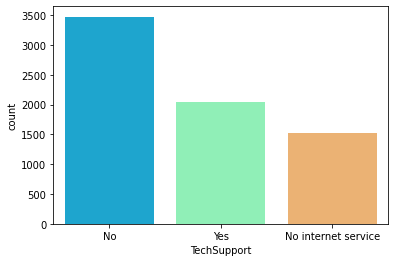

In [25]:
sns.countplot(x='TechSupport', data=df, palette="rainbow")

People with no tech support are higher in number than people with tech support and no internet service

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

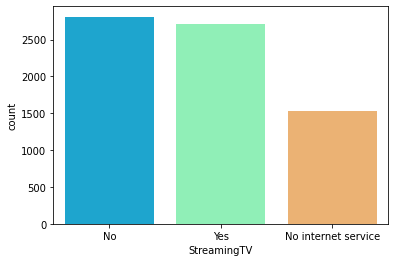

In [26]:
sns.countplot(x='StreamingTV', data=df, palette="rainbow")

The ration of people who have a streamingTV and who dont have one is almost the same 

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

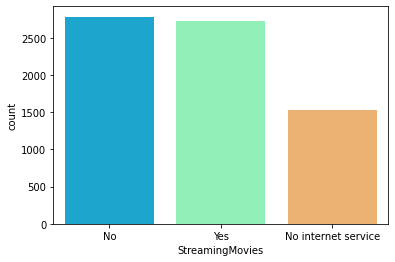

In [27]:
sns.countplot(x='StreamingMovies', data=df, palette="rainbow")

The ration of people who StreamMovies and who dont is almost the same 

<AxesSubplot:xlabel='Contract', ylabel='count'>

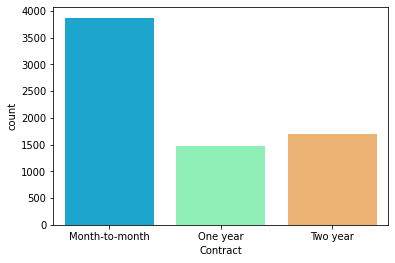

In [28]:
sns.countplot(x='Contract', data=df, palette="rainbow")

The people who believe in month to month contract is higher and lesser people opt for a 1 year contract

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

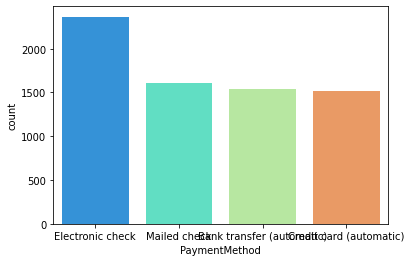

In [29]:
sns.countplot(x='PaymentMethod', data=df, palette="rainbow")

People prefer the electronic check method for payment. The other payment methods are preferred in almost the same ratio

Scatterplot for numerical data

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

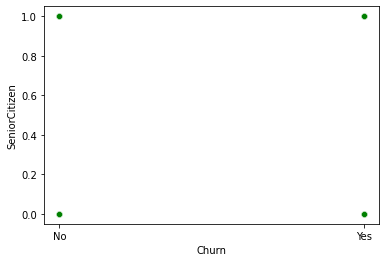

In [30]:
sns.scatterplot(x = "Churn", y = "SeniorCitizen", data = df,color='green')

The data points for whether a person will churn or not if he is a senior citizen or not is unifrom

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

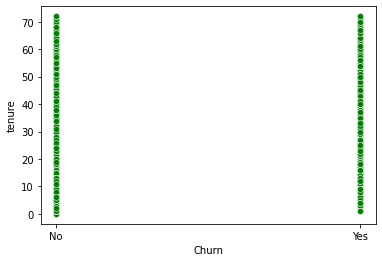

In [31]:
sns.scatterplot(x = "Churn", y = "tenure", data = df,color='green')

The data points for whether a person will churn or not depending on their tenure is uniformly distributed

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

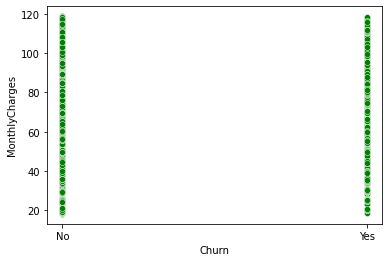

In [32]:
sns.scatterplot(x = "Churn", y = "MonthlyCharges", data = df,color='green')

The data points for whether a person will churn or not is unifromly distributed for monthly charges

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

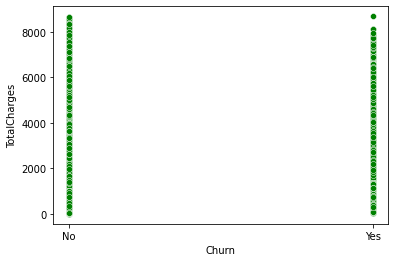

In [33]:
sns.scatterplot(x = "Churn", y = "TotalCharges", data = df,color='green')

The data points for whether a person will churn or not is unifromoly distributed for the TotalCharges

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

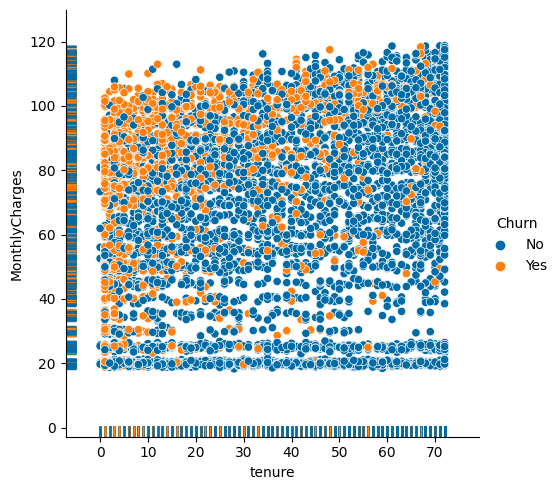

In [34]:
plt.style.use('default')
plt.style.use('tableau-colorblind10')

sns.relplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', legend=False)

From the above plot we see that people in the initial months of their service  are more prone to discontinue if they are unhappy with the service offered to them and therefore strong retention on those phase are required.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

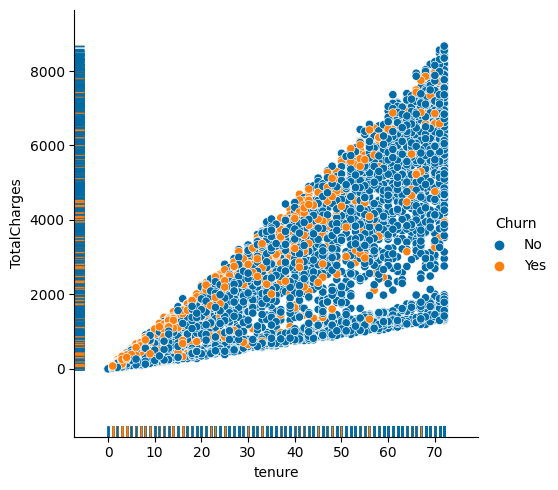

In [35]:
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='TotalCharges', hue='Churn', legend=False)

The above plot shows us that as the tenure increases the total charge increase as well and if people have chosen to spend a high tenure using the service then the churn criteria is low or negligible.

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

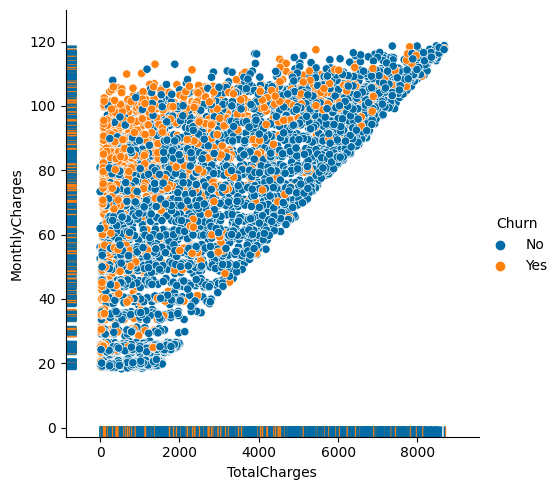

In [36]:
sns.relplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', legend=False)

The above plot shows us that people with high monthly charges tend to leave the service and are not able to contribute much to the total charges. Similarly if a customer has chosen to stick around with the reasonable monthly charges then there is a steep increase with the total charges as well.

# Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])

df['Churn'] = df['Churn'].astype('int')
df['Churn'].dtype

dtype('int32')

i will use ordinal encoding instead of one hot coding as a lot of categories are present

In [38]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1


we have successfully encoded our data, now we can plot the normal distribution curve

# Normal Distribution Plot

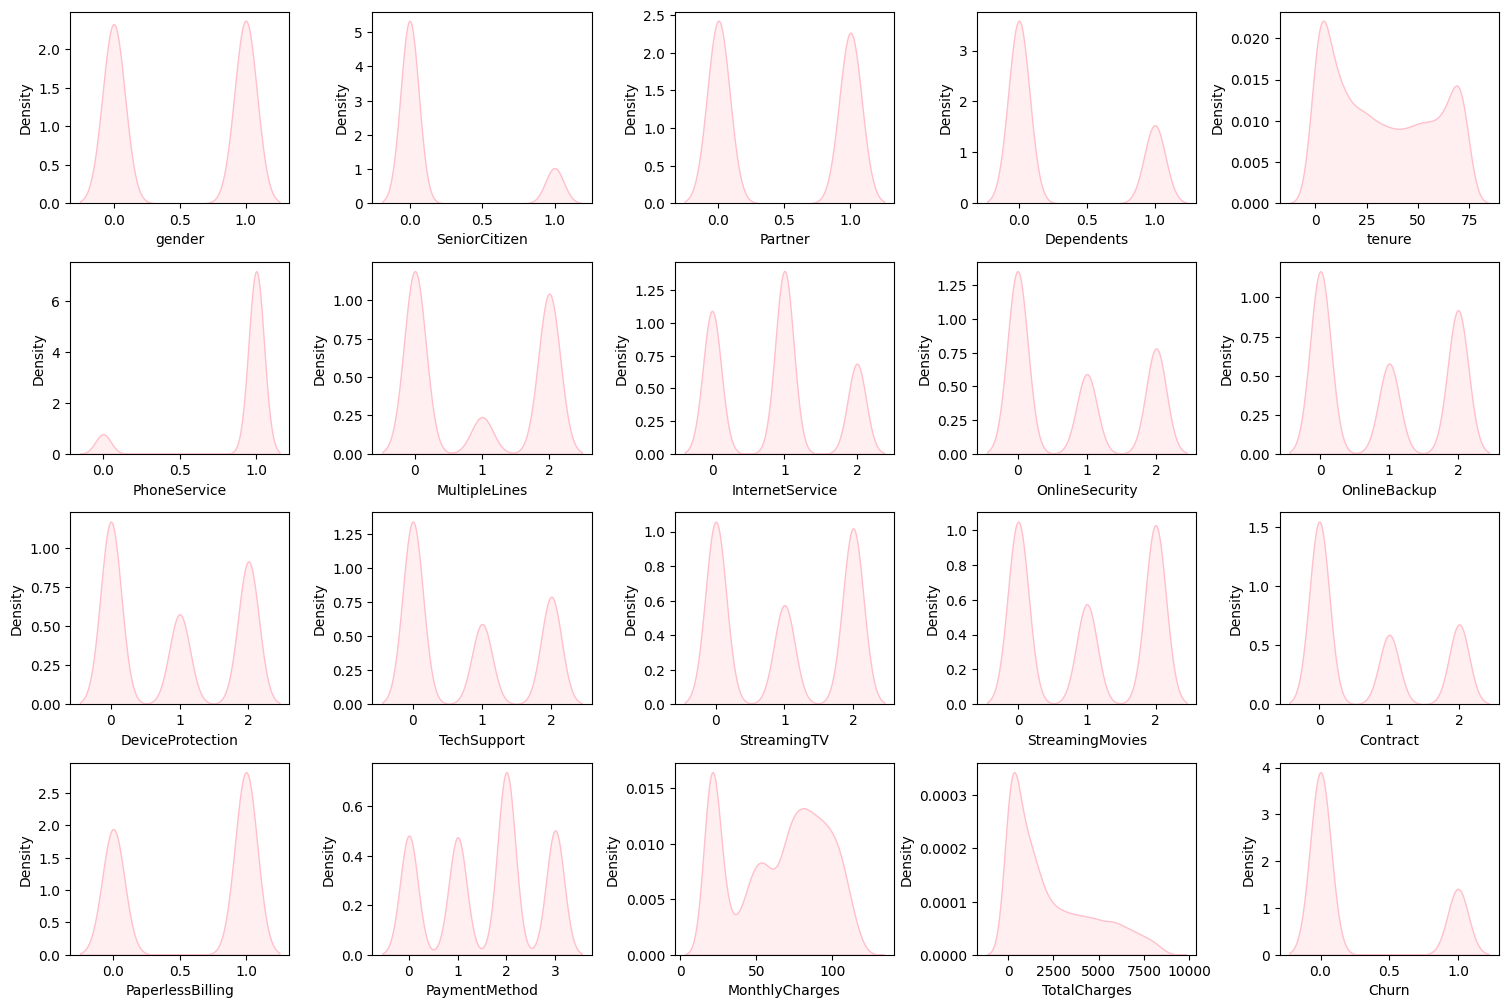

In [39]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="pink", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can observe that skewness is present in some columns like MonthCharges, Total Charges, PhoneService, Tenure and a little in other columns. The data is not nromally distributed

# Boxplot

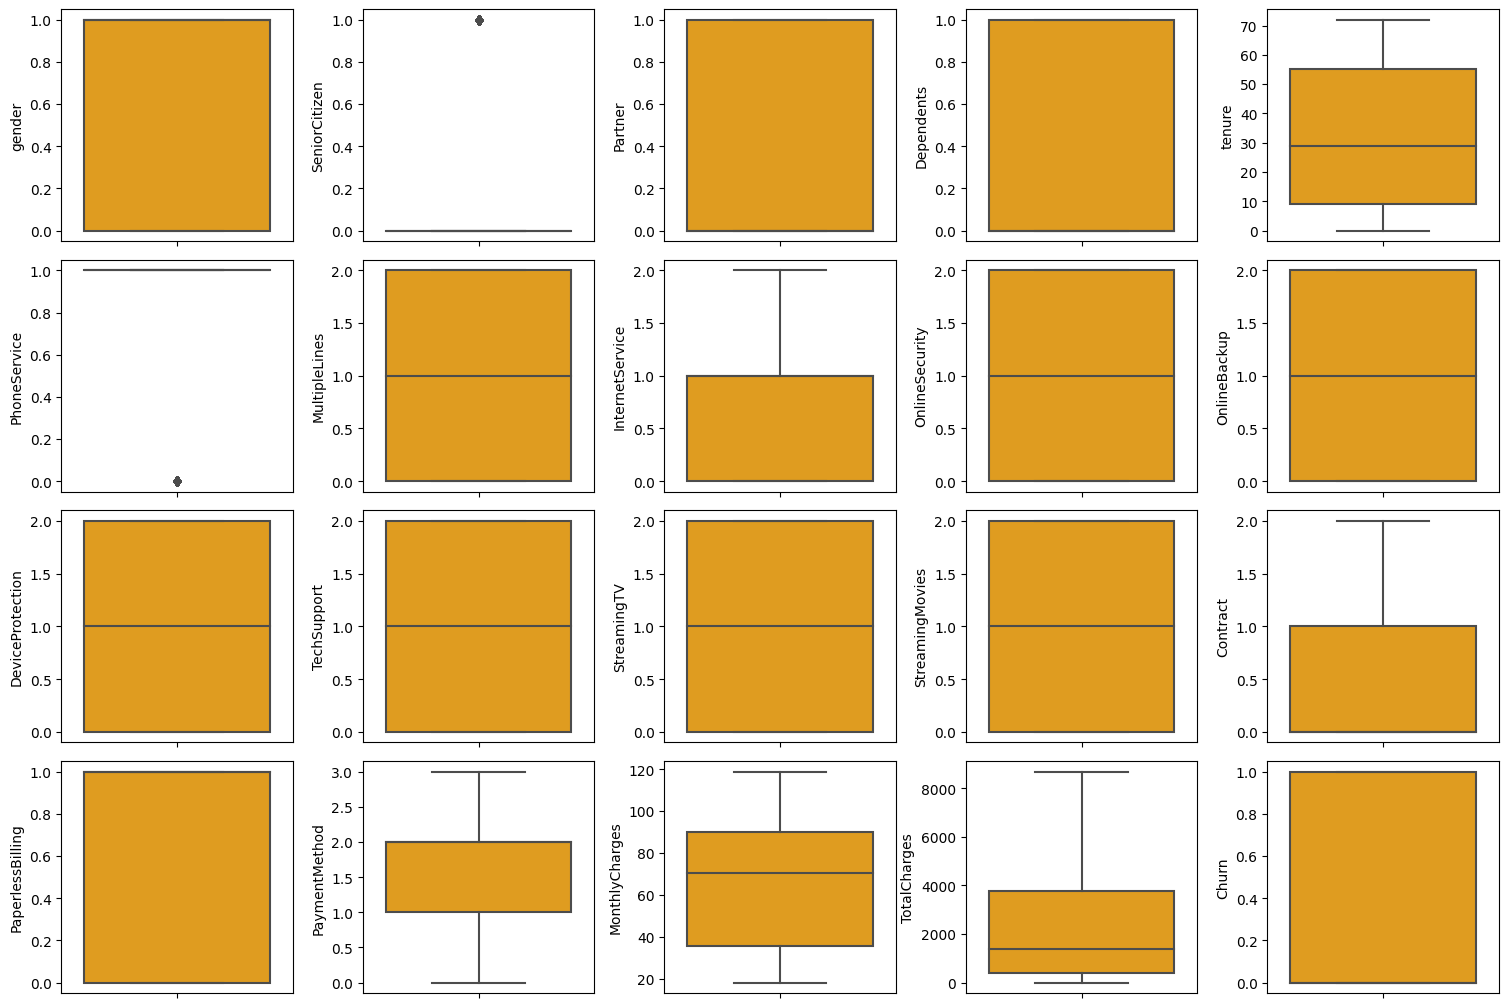

In [40]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], color='orange')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we dont have outiers present in our data. The outliers that are present in 2 columns are almost negligible and can be ignore. We will not use the z-score method to remove any outliers

Histogram

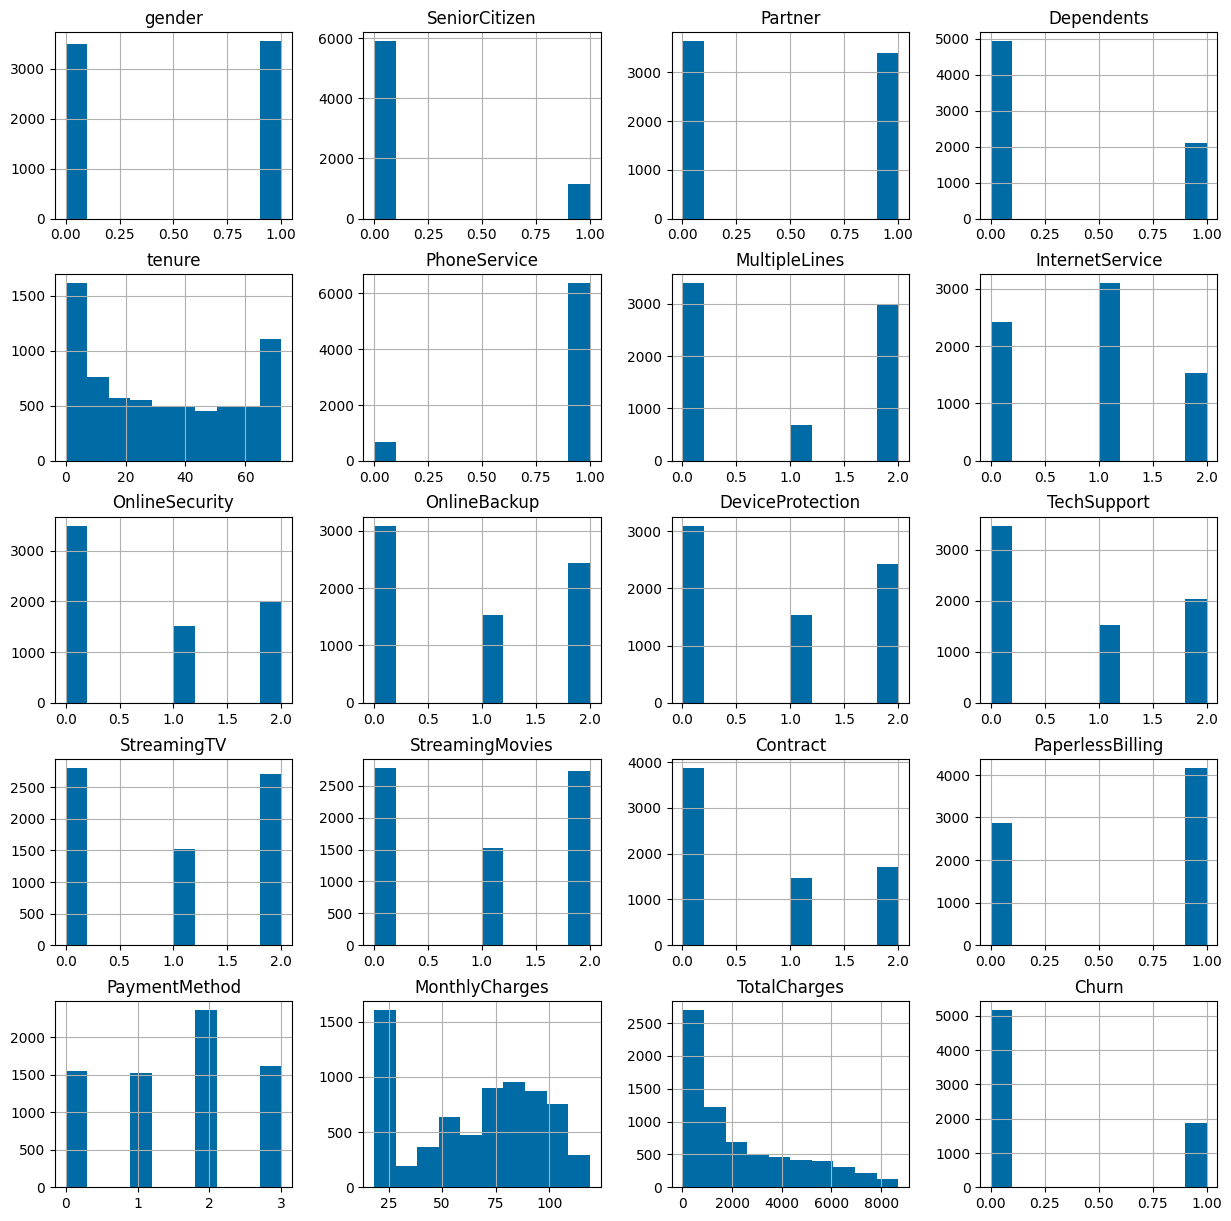

In [41]:
df.hist(figsize=(15,15))
plt.show()

# Correlation With target column Churn

In [42]:
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.198324
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

if we take the correlation range as (-0.5,0.5) we see that there are no high correlation values and we dont have to worry about multicollinearity

A positive correlation means that the independent and dependent variable move in the same direction

A negative correlation indicates that the independet and dependent variables move in the opposite direction

Now let us plot a heat map to understand the correlation better

<AxesSubplot:>

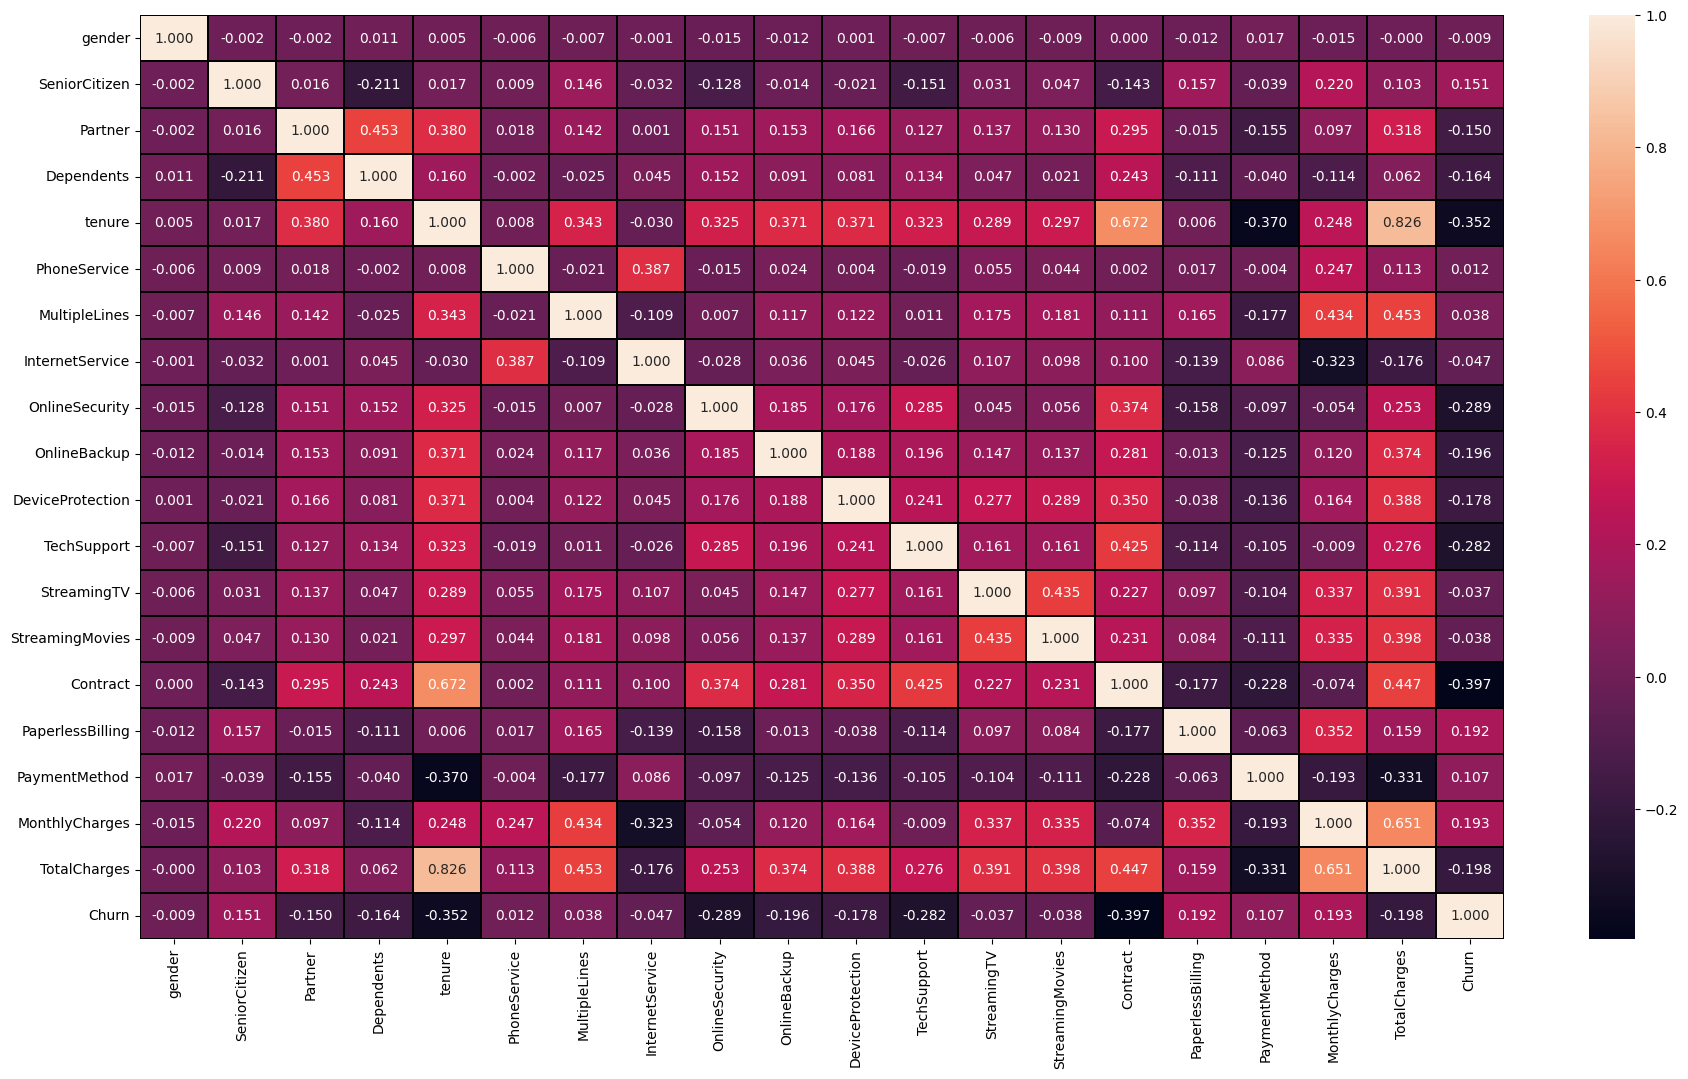

In [43]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='.3f')

we can clearly see no high correlation values

# Correlation bar plot with target variable Churn

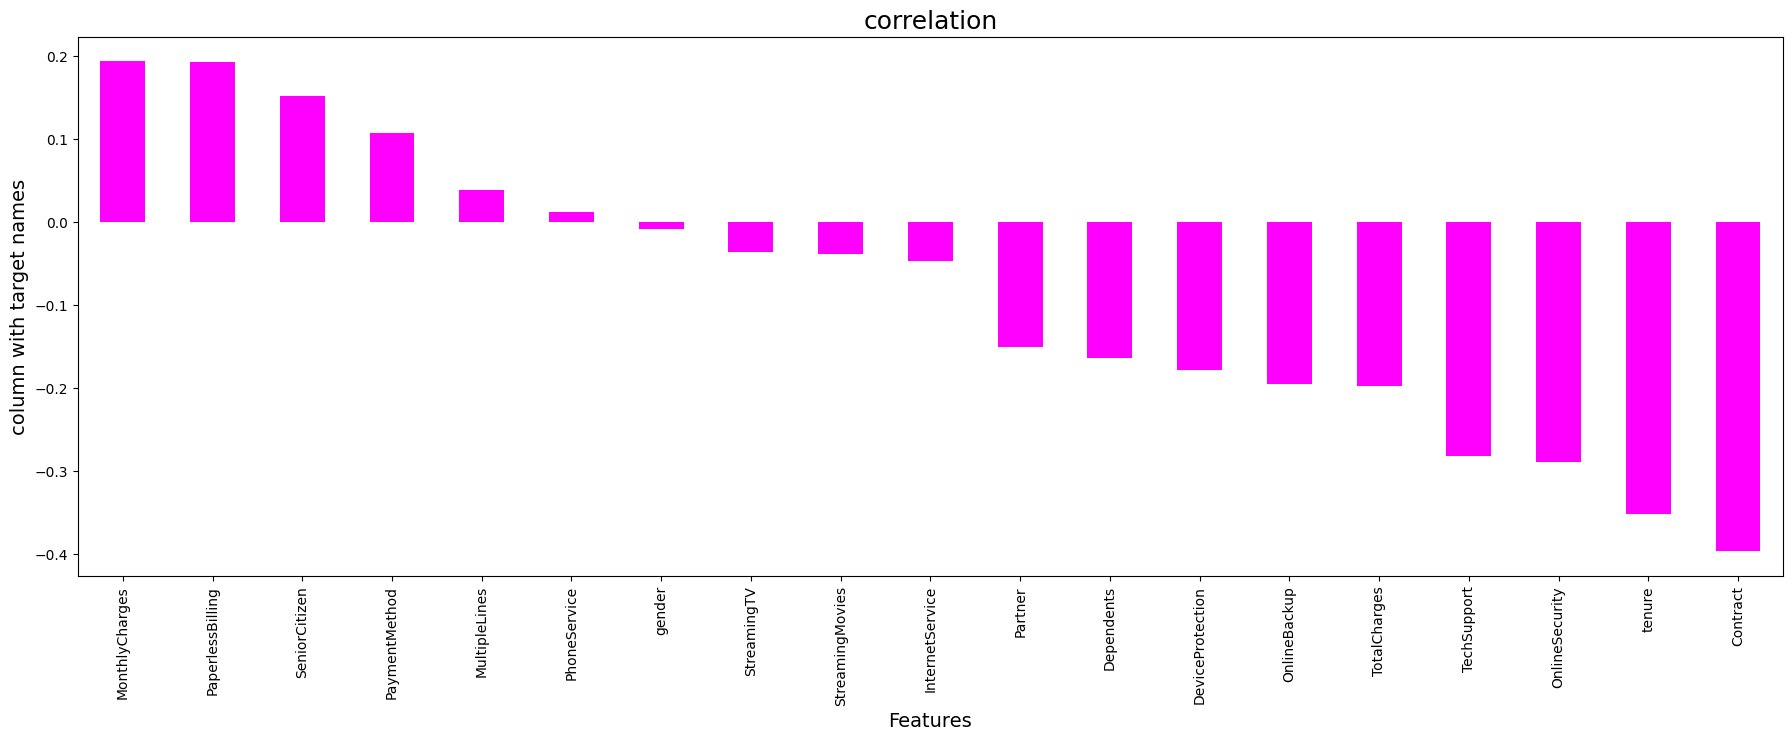

In [44]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='magenta')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

we can easily see the columns that are postively and negatively correlated with our target variable Churn

# Handling Skewness

In [45]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963235
Churn               1.063031
dtype: float64

Only two of our columns are highly skewed(if we take the skewness range as (-0.5,0.5)), Senior Citizen and Churn

# Applying Log Transform

In [46]:
for col in df:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.434281
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges       -0.824458
Churn               1.063031
dtype: float64

we have been able to remove skewness upto some extent 

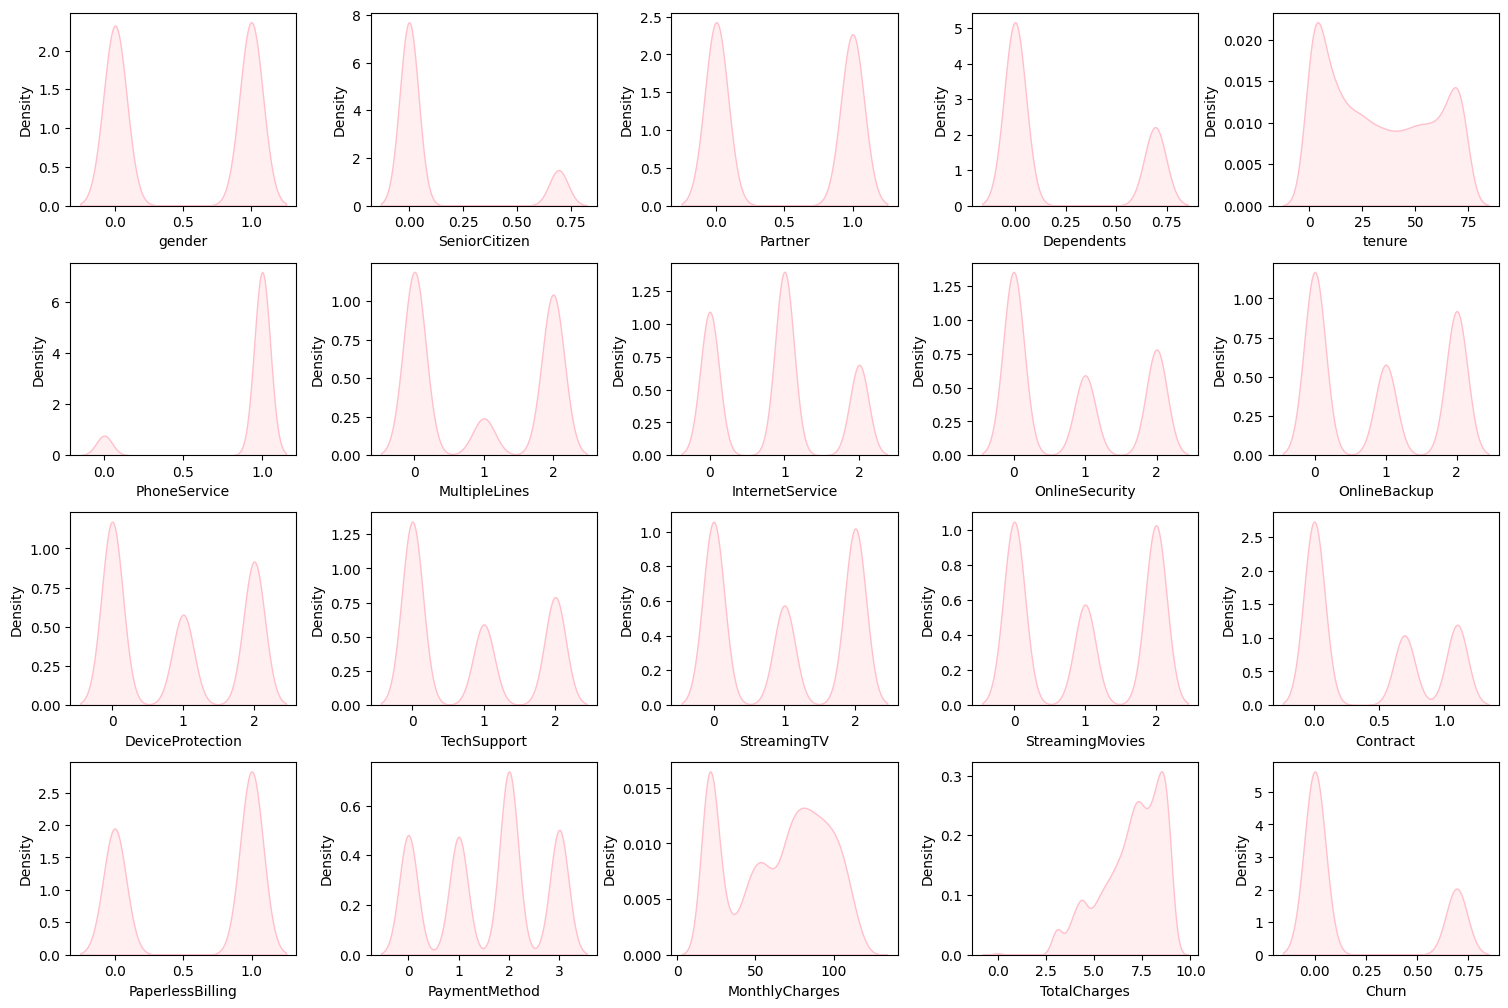

In [47]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="pink", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

# Separating the columns into 'features' and 'targets' as 'a' and 'b' for our classification model

In [57]:
a=df.drop('Churn',axis=1)
b=df['Churn']
print(a.shape)
print(b.shape)

(7043, 19)
(7043,)


In [58]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

# Applying Smote to balance the classes in Churn

In [59]:
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,1.0,2.0,29.85,3.429137,0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.693147,0.0,3.0,56.95,7.544597,0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.000000,1.0,3.0,53.85,4.692723,1
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.693147,0.0,0.0,42.30,7.518471,0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,2.0,70.70,5.028148,1


In [60]:
b.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

we can see that our data is imbalanced

In [61]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
a, b = oversample.fit_resample(a,b)

In [62]:
b.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

we have successfully balanced our data

# Feature Scaling

i am scaling my data to avoid any biasness towards a column so that our data is standardized

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
a=sc.fit_transform(a)
a

array([[-1.05535735, -0.52226099,  1.18226413, ...,  0.35624449,
        -1.31002849, -2.02708257],
       [ 1.03497533, -0.52226099, -0.90946999, ...,  1.37143658,
        -0.37124894,  0.50511392],
       [ 1.03497533, -0.52226099, -0.90946999, ...,  1.37143658,
        -0.478637  , -1.24961201],
       ...,
       [ 1.03497533, -0.52226099,  1.18226413, ...,  0.35624449,
         0.06463912,  0.25530069],
       [ 1.03497533, -0.20182187, -0.90946999, ..., -1.43136782,
         1.09325015,  0.92330781],
       [-0.72314492, -0.52226099,  0.84982897, ...,  0.51758696,
         1.22393705,  0.58843117]])

# Finding the best accuracy at random state

In [64]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy is", maxAccu,"at Random State", maxRS)

Best accuracy is 79.95169082125604 at Random State 973


# Logistic Regression

In [67]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=.2,random_state=973)

lr=LogisticRegression()
#training the model
lr.fit(x_train,y_train)
    
#Predicting y_test
pred=lr.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(lr,a,b,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  79.95169082125604

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79      1050
           1       0.77      0.84      0.81      1020

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

Cross Validation Score: 77.28068590161178

Accuracy Score - Cross Validation Score is 2.671004919644261


# Support vector classifier

In [68]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=.2,random_state=973)

svc=SVC()
#training the model
svc.fit(x_train,y_train)
    
#Predicting y_test
pred=svc.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(svc,a,b,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  85.02415458937197

Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1050
           1       0.83      0.87      0.85      1020

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

Cross Validation Score: 82.3646140519236

Accuracy Score - Cross Validation Score is 2.659540537448379


# Decision Tree Classifier

In [69]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=.2,random_state=973)

dt=DecisionTreeClassifier()
#training the model
dt.fit(x_train,y_train)
    
#Predicting y_test
pred=dt.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(dt,a,b,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  82.56038647342994

Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1050
           1       0.81      0.84      0.83      1020

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

Cross Validation Score: 80.42264577393918

Accuracy Score - Cross Validation Score is 2.137740699490763


# KNeighborsClassifier

In [70]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=.2,random_state=973)

kn=KNeighborsClassifier()
#training the model
kn.fit(x_train,y_train)
    
#Predicting y_test
pred=kn.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(kn,a,b,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  80.19323671497585

Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.72      0.79      1050
           1       0.75      0.89      0.82      1020

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070

Cross Validation Score: 79.1169063446366

Accuracy Score - Cross Validation Score is 1.0763303703392495


# Random Forest Classifier

In [71]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=.2,random_state=973)

rf=RandomForestClassifier()
#training the model
rf.fit(x_train,y_train)
    
#Predicting y_test
pred=rf.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(rf,a,b,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  88.16425120772948

Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      1050
           1       0.89      0.87      0.88      1020

    accuracy                           0.88      2070
   macro avg       0.88      0.88      0.88      2070
weighted avg       0.88      0.88      0.88      2070

Cross Validation Score: 84.85846041052294

Accuracy Score - Cross Validation Score is 3.305790797206541


# Extra Trees Classifier

In [72]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=.2,random_state=973)

et=ExtraTreesClassifier()
#training the model
et.fit(x_train,y_train)
    
#Predicting y_test
pred=et.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(et,a,b,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  87.6328502415459

Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1050
           1       0.87      0.88      0.87      1020

    accuracy                           0.88      2070
   macro avg       0.88      0.88      0.88      2070
weighted avg       0.88      0.88      0.88      2070

Cross Validation Score: 85.80525960638177

Accuracy Score - Cross Validation Score is 1.8275906351641282


i will choose random forest classifer for hyperparamter tuning as the difference between the accuracy and the cross validation is less with a higher accuracy when compared to other models

# Hyperparametertuning on Extra Trees Classifier

the parameter have been chosen after referring from the sklearn webpage

In [85]:
from sklearn.model_selection import GridSearchCV
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [10, 42, 1000],
              'max_depth' : [10, 15, 30],
              'n_estimators' : [100, 200, 300]
             }

In [91]:
GSCV = GridSearchCV(et, fmod_param, cv=5)

In [93]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [10, 42, 1000]})

In [94]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 10}

In [95]:
GSCV.best_score_

0.8554003386020987

In [98]:
Final_Model = ExtraTreesClassifier(criterion='gini', max_depth=15, n_estimators=100, n_jobs=-2, random_state=10)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 87.53623188405797


our final model accuracy after hyperparameter tuning is 85,03% and this is the threshold of hyperparameter tuning

# AOC ROC Curve

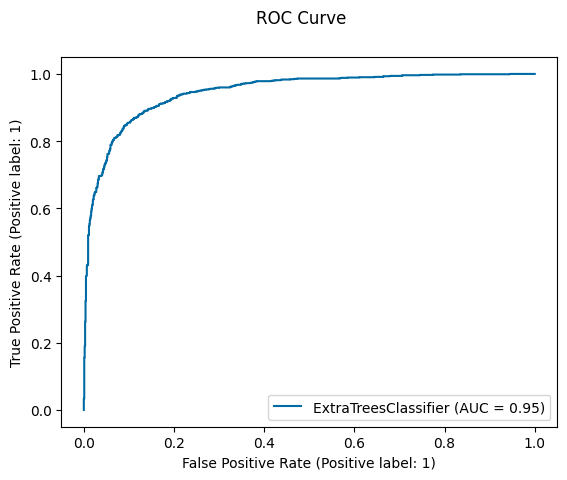

In [99]:
from sklearn import metrics
curve = metrics.plot_roc_curve(Final_Model, x_test, y_test)
curve.figure_.suptitle("ROC Curve")
plt.show()

# The Auc of my final model,DecisionTreeClassifier, is 95%

# Confusion Matrix

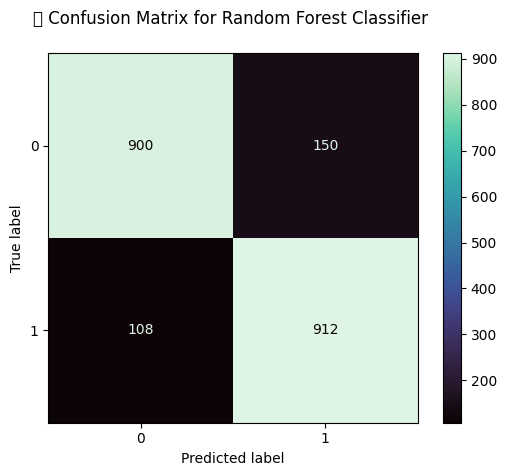

In [100]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Random Forest Classifier \n')
plt.show()

From the confusion matrix we can see that our TP=900,FP=150,FN=108,TN=912

that means that are 900 postive values were correctly classified

150 negative values were correctly classified

912 postive values were incorrectly classified

108 negative values were incorrectly classifed

# Model Saving

In [101]:
import pickle
filename='Customer_Churn_Analysis_E8.pkl'
pickle.dump(RandomForestClassifier(),open(filename,'wb'))